# 10分钟入门pandas
教程译自[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.18.0/10min.html)

## 目录
* [创建对象](#创建对象)
* [数据视图](#数据视图)
* [数据选取](#数据选取)
* [数据缺失的处理](#数据缺失的处理)
* [函数操作](#函数操作)
* [数据合并](#数据合并)
* [分组](#分组)
* [数据变形](#数据变形)
* [时间序列](#时间序列)
* [数据标签](#数据标签)
* [绘图](#绘图)
* [导入导出数据](#导入导出数据)

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 创建对象

[返回目录](#目录)

传入数据列表创建Series对象

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

创建DataFrame对象

通过时间索引，自定义标签列名，和numpy的array数据来创建DataFrame对象

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.951329,-1.679055,-0.667085,1.441845
2013-01-02,0.524317,-0.264851,-0.314839,0.919123
2013-01-03,-0.310487,-0.501839,1.858538,0.710788
2013-01-04,-1.747358,0.000706,-0.663943,-0.207236
2013-01-05,-0.775762,0.101659,-0.875224,0.164824
2013-01-06,-0.243065,1.359822,-1.840897,1.460339


通过字典创建DataFrame对象

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(3, index=list(range(4)), dtype='float'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo',
                    'G': 2})
df2


,A,B,C,D,E,F,G
0,1.0,2013-01-02,3.0,3,test,foo,2
1,1.0,2013-01-02,3.0,3,train,foo,2
2,1.0,2013-01-02,3.0,3,test,foo,2
3,1.0,2013-01-02,3.0,3,train,foo,2


In [6]:
df2.dtypes


A           float64
B    datetime64[ns]
C           float64
D             int32
E          category
F            object
G             int64
dtype: object

In [7]:
dir(df2)


['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '_

## 数据视图

[返回目录](#目录)

观察数据的头部和尾部

In [8]:
df.head()


,A,B,C,D
2013-01-01,1.951329,-1.679055,-0.667085,1.441845
2013-01-02,0.524317,-0.264851,-0.314839,0.919123
2013-01-03,-0.310487,-0.501839,1.858538,0.710788
2013-01-04,-1.747358,0.000706,-0.663943,-0.207236
2013-01-05,-0.775762,0.101659,-0.875224,0.164824


In [9]:
df.tail(3)


,A,B,C,D
2013-01-04,-1.747358,0.000706,-0.663943,-0.207236
2013-01-05,-0.775762,0.101659,-0.875224,0.164824
2013-01-06,-0.243065,1.359822,-1.840897,1.460339


查看DataFrame对象的索引，列名，数据信息

In [10]:
df.index


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values


array([[ 1.95132921e+00, -1.67905513e+00, -6.67085270e-01,
         1.44184516e+00],
       [ 5.24317370e-01, -2.64850758e-01, -3.14838959e-01,
         9.19122988e-01],
       [-3.10486781e-01, -5.01838941e-01,  1.85853800e+00,
         7.10788300e-01],
       [-1.74735803e+00,  7.06462634e-04, -6.63943244e-01,
        -2.07235529e-01],
       [-7.75762304e-01,  1.01658879e-01, -8.75224486e-01,
         1.64823952e-01],
       [-2.43064706e-01,  1.35982241e+00, -1.84089711e+00,
         1.46033945e+00]])

简单统计

In [13]:
df.describe()


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.100171,-0.163926,-0.417242,0.748281
std,1.251634,0.983813,1.228779,0.674105
min,-1.747358,-1.679055,-1.840897,-0.207236
25%,-0.659443,-0.442592,-0.823190,0.301315
50%,-0.276776,-0.132072,-0.665514,0.814956
75%,0.332472,0.076421,-0.402115,1.311165
max,1.951329,1.359822,1.858538,1.460339


转置数据

In [14]:
df.T


,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.951329,0.524317,-0.310487,-1.747358,-0.775762,-0.243065
B,-1.679055,-0.264851,-0.501839,0.000706,0.101659,1.359822
C,-0.667085,-0.314839,1.858538,-0.663943,-0.875224,-1.840897
D,1.441845,0.919123,0.710788,-0.207236,0.164824,1.460339


根据列名排序

In [15]:
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2013-01-01,1.441845,-0.667085,-1.679055,1.951329
2013-01-02,0.919123,-0.314839,-0.264851,0.524317
2013-01-03,0.710788,1.858538,-0.501839,-0.310487
2013-01-04,-0.207236,-0.663943,0.000706,-1.747358
2013-01-05,0.164824,-0.875224,0.101659,-0.775762
2013-01-06,1.460339,-1.840897,1.359822,-0.243065


根据B列数值排序

In [16]:
df.sort_values(by='B')


,A,B,C,D
2013-01-01,1.951329,-1.679055,-0.667085,1.441845
2013-01-03,-0.310487,-0.501839,1.858538,0.710788
2013-01-02,0.524317,-0.264851,-0.314839,0.919123
2013-01-04,-1.747358,0.000706,-0.663943,-0.207236
2013-01-05,-0.775762,0.101659,-0.875224,0.164824
2013-01-06,-0.243065,1.359822,-1.840897,1.460339


## 数据选取

[返回目录](#目录)

### 选取

选取单列数据

In [17]:
df['A']


2013-01-01    1.951329
2013-01-02    0.524317
2013-01-03   -0.310487
2013-01-04   -1.747358
2013-01-05   -0.775762
2013-01-06   -0.243065
Freq: D, Name: A, dtype: float64

按行选取数据

In [18]:
df[0:3]


,A,B,C,D
2013-01-01,1.951329,-1.679055,-0.667085,1.441845
2013-01-02,0.524317,-0.264851,-0.314839,0.919123
2013-01-03,-0.310487,-0.501839,1.858538,0.710788


In [19]:
df['20130102':'20130104']


,A,B,C,D
2013-01-02,0.524317,-0.264851,-0.314839,0.919123
2013-01-03,-0.310487,-0.501839,1.858538,0.710788
2013-01-04,-1.747358,0.000706,-0.663943,-0.207236


### 通过标签选取数据

In [20]:
df.loc[dates[0]]


A    1.951329
B   -1.679055
C   -0.667085
D    1.441845
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
df.loc[:, ['A', 'B']]


,A,B
2013-01-01,1.951329,-1.679055
2013-01-02,0.524317,-0.264851
2013-01-03,-0.310487,-0.501839
2013-01-04,-1.747358,0.000706
2013-01-05,-0.775762,0.101659
2013-01-06,-0.243065,1.359822


In [22]:
df.loc['20130102':'20130104', ['A', 'B']]


,A,B
2013-01-02,0.524317,-0.264851
2013-01-03,-0.310487,-0.501839
2013-01-04,-1.747358,0.000706


In [23]:
df.loc['20130102', ['A', 'B']]


A    0.524317
B   -0.264851
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
df.loc[dates[0], 'A']


1.951329214937723

In [25]:
df.at[dates[0], 'A']


1.951329214937723

### 通过位置选取数据

In [26]:
df.iloc[3]


A   -1.747358
B    0.000706
C   -0.663943
D   -0.207236
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
df.iloc[3:5, 0:2]


,A,B
2013-01-04,-1.747358,0.000706
2013-01-05,-0.775762,0.101659


In [28]:
df.iloc[[1, 2, 4], [0, 2]]


,A,C
2013-01-02,0.524317,-0.314839
2013-01-03,-0.310487,1.858538
2013-01-05,-0.775762,-0.875224


In [29]:
df.iloc[1:3]


,A,B,C,D
2013-01-02,0.524317,-0.264851,-0.314839,0.919123
2013-01-03,-0.310487,-0.501839,1.858538,0.710788


In [30]:
df.iloc[:, 1:3]


,B,C
2013-01-01,-1.679055,-0.667085
2013-01-02,-0.264851,-0.314839
2013-01-03,-0.501839,1.858538
2013-01-04,0.000706,-0.663943
2013-01-05,0.101659,-0.875224
2013-01-06,1.359822,-1.840897


In [31]:
df.iloc[1, 1]


-0.2648507581509638

In [32]:
df.iat[1, 1]


-0.2648507581509638

### 布尔索引 

In [33]:
df[df.A > 0]


,A,B,C,D
2013-01-01,1.951329,-1.679055,-0.667085,1.441845
2013-01-02,0.524317,-0.264851,-0.314839,0.919123


In [34]:
df[df > 0]


,A,B,C,D
2013-01-01,1.951329,NaN,NaN,1.441845
2013-01-02,0.524317,NaN,NaN,0.919123
2013-01-03,NaN,NaN,1.858538,0.710788
2013-01-04,NaN,0.000706,NaN,NaN
2013-01-05,NaN,0.101659,NaN,0.164824
2013-01-06,NaN,1.359822,NaN,1.460339


In [35]:
df2 = df.copy()


In [36]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']


In [37]:
df2


,A,B,C,D,E
2013-01-01,1.951329,-1.679055,-0.667085,1.441845,one
2013-01-02,0.524317,-0.264851,-0.314839,0.919123,one
2013-01-03,-0.310487,-0.501839,1.858538,0.710788,two
2013-01-04,-1.747358,0.000706,-0.663943,-0.207236,three
2013-01-05,-0.775762,0.101659,-0.875224,0.164824,four
2013-01-06,-0.243065,1.359822,-1.840897,1.460339,three


In [38]:
df2[df2['E'].isin(['one', 'four'])]


,A,B,C,D,E
2013-01-01,1.951329,-1.679055,-0.667085,1.441845,one
2013-01-02,0.524317,-0.264851,-0.314839,0.919123,one
2013-01-05,-0.775762,0.101659,-0.875224,0.164824,four


### 修改数据

In [39]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [40]:
df['F'] = s1


In [41]:
df.at[dates[0], 'A'] = 0


In [42]:
df.iat[0, 1] = 0


In [43]:
df.loc[:, 'D'] = np.array([5] * len(df))


/var/folders/2k/qq6ymbz91yqcn1tzrllv5jfc0000gn/T/ipykernel_11426/438096961.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


In [44]:
df


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.667085,5,NaN
2013-01-02,0.524317,-0.264851,-0.314839,5,1.0
2013-01-03,-0.310487,-0.501839,1.858538,5,2.0
2013-01-04,-1.747358,0.000706,-0.663943,5,3.0
2013-01-05,-0.775762,0.101659,-0.875224,5,4.0
2013-01-06,-0.243065,1.359822,-1.840897,5,5.0


In [45]:
df2 = df.copy()


In [46]:
df2[df2 > 0] = -df2


In [47]:
df2


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.667085,-5,NaN
2013-01-02,-0.524317,-0.264851,-0.314839,-5,-1.0
2013-01-03,-0.310487,-0.501839,-1.858538,-5,-2.0
2013-01-04,-1.747358,-0.000706,-0.663943,-5,-3.0
2013-01-05,-0.775762,-0.101659,-0.875224,-5,-4.0
2013-01-06,-0.243065,-1.359822,-1.840897,-5,-5.0


## 数据缺失的处理

[返回目录](#目录)

In [48]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])


In [49]:
df1.loc[dates[0]:dates[1], 'E'] = 1


In [50]:
df1


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.667085,5,NaN,1.0
2013-01-02,0.524317,-0.264851,-0.314839,5,1.0,1.0
2013-01-03,-0.310487,-0.501839,1.858538,5,2.0,NaN
2013-01-04,-1.747358,0.000706,-0.663943,5,3.0,NaN


舍弃含有NaN的行

In [51]:
df1.dropna(how='any')


,A,B,C,D,F,E
2013-01-02,0.524317,-0.264851,-0.314839,5,1.0,1.0


填充缺失数据

In [52]:
df1.fillna(value=5)


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.667085,5,5.0,1.0
2013-01-02,0.524317,-0.264851,-0.314839,5,1.0,1.0
2013-01-03,-0.310487,-0.501839,1.858538,5,2.0,5.0
2013-01-04,-1.747358,0.000706,-0.663943,5,3.0,5.0


In [53]:
pd.isnull(df1)


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 函数操作

[返回目录](#目录)

### 统计

纵向求均值

In [54]:
df.mean()


A   -0.425392
B    0.115916
C   -0.417242
D    5.000000
F    3.000000
dtype: float64

横向求均值

In [55]:
df.mean(1)


2013-01-01    1.083229
2013-01-02    1.188926
2013-01-03    1.609242
2013-01-04    1.117881
2013-01-05    1.490134
2013-01-06    1.855172
Freq: D, dtype: float64

In [56]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)


In [57]:
s


2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [58]:
df.sub(s, axis='index')


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.310487,-1.501839,0.858538,4.0,1.0
2013-01-04,-4.747358,-2.999294,-3.663943,2.0,0.0
2013-01-05,-5.775762,-4.898341,-5.875224,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply函数

In [59]:
new_var = np.cumsum
df.apply(new_var)


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.667085,5,NaN
2013-01-02,0.524317,-0.264851,-0.981924,10,1.0
2013-01-03,0.213831,-0.766690,0.876614,15,3.0
2013-01-04,-1.533527,-0.765983,0.212671,20,6.0
2013-01-05,-2.309290,-0.664324,-0.662554,25,10.0
2013-01-06,-2.552354,0.695498,-2.503451,30,15.0


In [60]:
df.apply(lambda x: x.max() - x.min())


A    2.271675
B    1.861661
C    3.699435
D    0.000000
F    4.000000
dtype: float64

### 直方统计

In [61]:
s = pd.Series(np.random.randint(0, 7, size=10))


In [62]:
s


0    5
1    3
2    0
3    1
4    4
5    6
6    2
7    0
8    5
9    5
dtype: int64

In [63]:
s.value_counts()


5    3
0    2
3    1
1    1
4    1
6    1
2    1
dtype: int64

### 字符串方法

In [64]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])


In [65]:
s.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

[返回目录](#目录)

### Concat函数

In [66]:
df = pd.DataFrame(np.random.randn(10, 4))


In [67]:
df


,0,1,2,3
0,-1.711910,2.188203,-0.098159,1.717267
1,-0.653520,-0.854841,-0.522959,-0.032598
2,-0.167918,-0.642283,1.472397,0.884862
3,0.469709,1.256520,-0.665741,-1.396801
4,-0.710835,0.076864,-1.163012,-0.448017
5,0.852318,1.267124,0.670482,0.062869
6,-1.319991,0.640129,0.735366,-0.505356
7,-1.256861,-0.480622,0.186437,-0.980923
8,-1.206498,1.004782,-1.040036,1.867576
9,0.924419,0.531907,-0.114918,-0.753313


In [68]:
pieces = [df[:3], df[3:6], df[7:]]


In [69]:
pd.concat(pieces)


,0,1,2,3
0,-1.711910,2.188203,-0.098159,1.717267
1,-0.653520,-0.854841,-0.522959,-0.032598
2,-0.167918,-0.642283,1.472397,0.884862
3,0.469709,1.256520,-0.665741,-1.396801
4,-0.710835,0.076864,-1.163012,-0.448017
5,0.852318,1.267124,0.670482,0.062869
7,-1.256861,-0.480622,0.186437,-0.980923
8,-1.206498,1.004782,-1.040036,1.867576
9,0.924419,0.531907,-0.114918,-0.753313


### Join函数

In [70]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})


In [71]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})


In [72]:
left


,key,lval
0,foo,1
1,foo,2


In [73]:
right


,key,rval
0,foo,4
1,foo,5


In [74]:
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append函数

In [75]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])


In [76]:
df


,A,B,C,D
0,-0.799746,1.114682,-0.852459,0.778453
1,-0.485574,0.824327,-0.066657,-1.995448
2,1.188064,-0.507507,-1.482885,-0.353099
3,-2.395420,1.211003,-0.835242,-0.424856
4,-0.697033,-1.975979,0.058783,1.924817
5,-1.569838,0.494407,0.012662,0.478010
6,2.845601,-0.064673,0.467992,1.758814
7,-1.536929,-0.335301,-1.023655,-0.010008


In [77]:
s = df.iloc[3]


In [78]:
df.append(s, ignore_index=True)


/var/folders/2k/qq6ymbz91yqcn1tzrllv5jfc0000gn/T/ipykernel_11426/1496751184.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,-0.799746,1.114682,-0.852459,0.778453
1,-0.485574,0.824327,-0.066657,-1.995448
2,1.188064,-0.507507,-1.482885,-0.353099
3,-2.395420,1.211003,-0.835242,-0.424856
4,-0.697033,-1.975979,0.058783,1.924817
5,-1.569838,0.494407,0.012662,0.478010
6,2.845601,-0.064673,0.467992,1.758814
7,-1.536929,-0.335301,-1.023655,-0.010008
8,-2.395420,1.211003,-0.835242,-0.424856


## 分组

[返回目录](#目录)

In [79]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})


In [80]:
df


,A,B,C,D
0,foo,one,0.038342,-1.543939
1,bar,one,0.849246,-1.105751
2,foo,two,-0.532908,1.315861
3,bar,three,-0.540821,-0.968579
4,foo,two,-0.345389,1.227340
5,bar,two,0.053151,-0.253876
6,foo,one,0.619453,-0.131049
7,foo,three,0.228131,0.690097


In [81]:
df.groupby('A').sum()


/var/folders/2k/qq6ymbz91yqcn1tzrllv5jfc0000gn/T/ipykernel_11426/3225325629.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,0.361576,-2.328207
foo,0.007629,1.558312


In [82]:
df.groupby(['A', 'B']).sum()


C         D
A   B                        
bar one    0.849246 -1.105751
    three -0.540821 -0.968579
    two    0.053151 -0.253876
foo one    0.657796 -1.674987
    three  0.228131  0.690097
    two   -0.878298  2.543202

## 数据变形

[返回目录](#目录)

### Stack函数

In [83]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))


In [84]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])


In [85]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])


In [86]:
df2 = df[:4]


In [87]:
df2


A         B
first second                    
bar   one    -1.479001 -1.234195
      two     0.335355 -0.221343
baz   one    -0.836105  0.292332
      two    -1.420631  0.252464

In [88]:
stacked = df2.stack()


In [89]:
stacked


first  second   
bar    one     A   -1.479001
               B   -1.234195
       two     A    0.335355
               B   -0.221343
baz    one     A   -0.836105
               B    0.292332
       two     A   -1.420631
               B    0.252464
dtype: float64

In [90]:
stacked.unstack()


A         B
first second                    
bar   one    -1.479001 -1.234195
      two     0.335355 -0.221343
baz   one    -0.836105  0.292332
      two    -1.420631  0.252464

In [91]:
stacked.unstack(1)


second        one       two
first                      
bar   A -1.479001  0.335355
      B -1.234195 -0.221343
baz   A -0.836105 -1.420631
      B  0.292332  0.252464

In [92]:
stacked.unstack(0)


first          bar       baz
second                      
one    A -1.479001 -0.836105
       B -1.234195  0.292332
two    A  0.335355 -1.420631
       B -0.221343  0.252464

### 数据透视表

In [93]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.696743,-0.415809
1,one,B,foo,-1.387805,-0.427517
2,two,C,foo,-0.200354,-0.324568
3,three,A,bar,0.647810,0.320423
4,one,B,bar,1.175223,0.360185
5,one,C,bar,-0.345042,0.503981
6,two,A,foo,0.363185,-0.305220
7,three,B,foo,1.823637,1.830702
8,one,C,foo,0.226606,-0.452362
9,one,A,bar,1.266384,0.051355


In [152]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')
df.pivot()

TypeError: pivot() missing 1 required argument: 'columns'

In [ ]:
# 获取全市场股票代码
tk_info = get_all_securities('stock', '20191111')
tk_list = tk_info.index.unique()

# 随机选取20支股票
tk_list = np.random.choice(tk_list, 20, replace=False).tolist()

# 提取所选20支股票回溯100天的收益率数据
data = get_price(tk_list, None, '20191111', '1d', ['quote_rate'], skip_paused = False, fq = None, bar_count = 100, is_panel = 1)
df = data.to_frame().reset_index()
df.columns = ['date', 'symbol', 'ret']
df_pivot = pd.pivot(values=df['ret'], index=df['date'], columns=df['symbol'])

# 绘制100天收益序列的相关性图
plt.figure(figsize=(7,4))
sns.heatmap(df_pivot.corr())
plt.show()

## 时间序列

[返回目录](#目录)

In [95]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')


In [96]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)


In [97]:
ts.resample('5Min').sum()


2012-01-01    25228
Freq: 5T, dtype: int64

In [98]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')


In [99]:
ts = pd.Series(np.random.randn(len(rng)), rng)


In [100]:
ts


2012-03-06   -0.265236
2012-03-07   -0.324656
2012-03-08    1.369989
2012-03-09   -0.983080
2012-03-10   -0.938128
Freq: D, dtype: float64

In [101]:
ts_utc = ts.tz_localize('UTC')


In [102]:
ts_utc


2012-03-06 00:00:00+00:00   -0.265236
2012-03-07 00:00:00+00:00   -0.324656
2012-03-08 00:00:00+00:00    1.369989
2012-03-09 00:00:00+00:00   -0.983080
2012-03-10 00:00:00+00:00   -0.938128
Freq: D, dtype: float64

In [103]:
ts_utc.tz_convert('US/Eastern')


2012-03-05 19:00:00-05:00   -0.265236
2012-03-06 19:00:00-05:00   -0.324656
2012-03-07 19:00:00-05:00    1.369989
2012-03-08 19:00:00-05:00   -0.983080
2012-03-09 19:00:00-05:00   -0.938128
Freq: D, dtype: float64

In [104]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')


In [105]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)


In [106]:
ts


2012-01-31   -0.824902
2012-02-29   -0.269297
2012-03-31    0.875642
2012-04-30   -0.085296
2012-05-31    1.155592
Freq: M, dtype: float64

In [107]:
ps = ts.to_period()


In [108]:
ps


2012-01   -0.824902
2012-02   -0.269297
2012-03    0.875642
2012-04   -0.085296
2012-05    1.155592
Freq: M, dtype: float64

In [109]:
ps.to_timestamp()


2012-01-01   -0.824902
2012-02-01   -0.269297
2012-03-01    0.875642
2012-04-01   -0.085296
2012-05-01    1.155592
Freq: MS, dtype: float64

In [110]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')


In [111]:
ts = pd.Series(np.random.randn(len(prng)), prng)


In [112]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9


In [113]:
ts.head()


1990-03-01 09:00   -1.054015
1990-06-01 09:00    0.307395
1990-09-01 09:00    1.246797
1990-12-01 09:00   -2.274105
1991-03-01 09:00    0.748741
Freq: H, dtype: float64

## 数据标签

[返回目录](#目录)

In [114]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], 
            "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})


In [115]:
df['grade'] = df['raw_grade'].astype("category")


In [116]:
df['grade']


0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [117]:
df["grade"].cat.categories = ["very good", "good", "very bad"]


/var/folders/2k/qq6ymbz91yqcn1tzrllv5jfc0000gn/T/ipykernel_11426/2725004496.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


In [118]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"])


In [119]:
df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [120]:
df.sort_values(by='grade')


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [121]:
df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图 

[返回目录](#目录)

In [122]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01    0.879021
2000-01-02   -0.040774
2000-01-03    1.948112
2000-01-04    1.404613
2000-01-05   -0.514295
                ...   
2002-09-22    0.183136
2002-09-23   -1.832585
2002-09-24    0.435953
2002-09-25   -0.056367
2002-09-26   -1.020497
Freq: D, Length: 1000, dtype: float64

In [123]:
ts = ts.cumsum()
ts

2000-01-01     0.879021
2000-01-02     0.838247
2000-01-03     2.786359
2000-01-04     4.190972
2000-01-05     3.676678
                ...    
2002-09-22   -26.615848
2002-09-23   -28.448433
2002-09-24   -28.012480
2002-09-25   -28.068847
2002-09-26   -29.089344
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

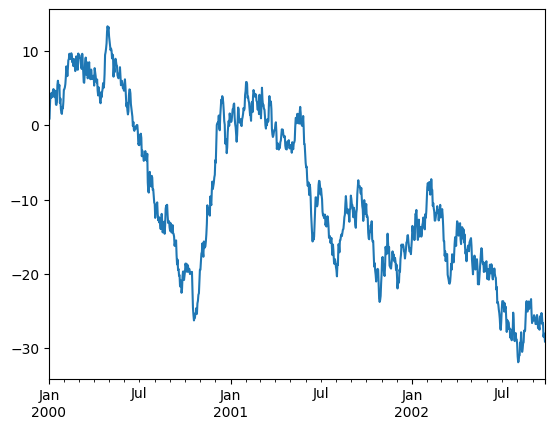

In [124]:
ts.plot()


<AxesSubplot: >

<Figure size 3520x1100 with 0 Axes>

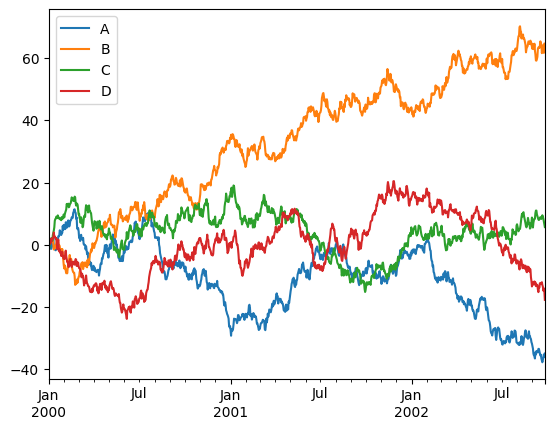

In [151]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(figsize=(16,5), dpi= 220)

df.plot()

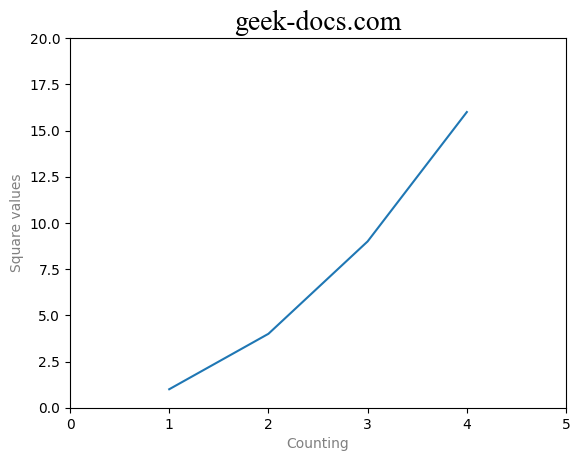

In [138]:
plt.axis([0,5, 0, 20])
plt.title("geek-docs.com", fontsize=20, fontname="Times New Roman")
plt.xlabel('Counting', color = 'gray')
plt.ylabel('Square values', color = 'gray')
plt.plot([1,2,3,4], [1,4,9,16])
plt.show()

In [127]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-1.156226,-1.712259,-0.679020,0.260466
2000-01-02,-1.489608,-3.114488,-1.980353,-2.833004
2000-01-03,-1.266489,-4.411654,-2.977834,-5.764575
2000-01-04,-2.061535,-4.952277,-3.815747,-7.631719
2000-01-05,-2.053414,-4.333940,-4.286494,-10.183639
...,...,...,...,...
2002-09-22,7222.631750,-16585.815638,-9432.445494,-16698.386620
2002-09-23,7226.184169,-16635.086833,-9446.945929,-16728.599159
2002-09-24,7227.267576,-16685.148775,-9460.820387,-16758.822971
2002-09-25,7226.645659,-16735.296322,-9475.913898,-16787.770746


<Figure size 640x480 with 0 Axes>

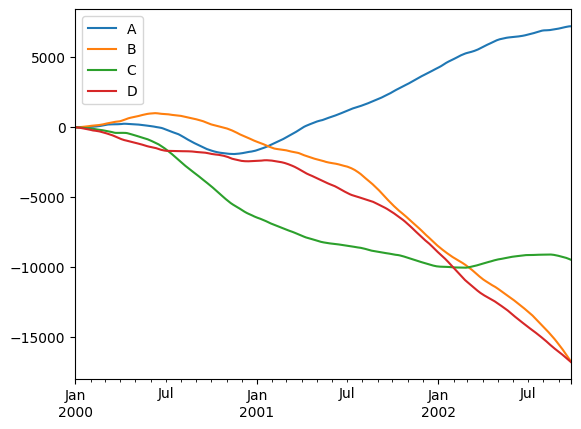

In [128]:
plt.figure()
df.plot()
plt.legend(loc='best')


## 导入导出数据

[返回目录](#目录)

In [129]:
df.to_csv('data/foo.csv')


In [130]:
pd.read_csv('data/foo.csv').head()


,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.156226,-1.712259,-0.679020,0.260466
1,2000-01-02,-1.489608,-3.114488,-1.980353,-2.833004
2,2000-01-03,-1.266489,-4.411654,-2.977834,-5.764575
3,2000-01-04,-2.061535,-4.952277,-3.815747,-7.631719
4,2000-01-05,-2.053414,-4.333940,-4.286494,-10.183639


In [131]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')


In [132]:
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()


,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.156226,-1.712259,-0.679020,0.260466
1,2000-01-02,-1.489608,-3.114488,-1.980353,-2.833004
2,2000-01-03,-1.266489,-4.411654,-2.977834,-5.764575
3,2000-01-04,-2.061535,-4.952277,-3.815747,-7.631719
4,2000-01-05,-2.053414,-4.333940,-4.286494,-10.183639
